<a href="https://colab.research.google.com/github/kushal-jaat/bert-llm/blob/main/BERT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requir

In [ ]:
import torch
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [ ]:
def tokenize_data(example, tokenizer):
    """
    Tokenizes the input text data using the provided tokenizer.

    Args:
        example (dict): A dictionary containing text data to be tokenized.
        tokenizer (BertTokenizer): The tokenizer to be used for tokenization.

    Returns:
        dict: A dictionary containing tokenized input ids and attention masks.
    """
    # Padding ensures all sequences are of the same length; truncation avoids sequences that are too long.
    return tokenizer(example['text'], padding='max_length', truncation=True)


In [ ]:
# def prepare_dataset(tokenizer, sample_size=None):
#     dataset = load_dataset('imdb')

#     # If sample_size is specified, use only a subset of the data
#     if sample_size:
#         train_dataset = dataset['train'].shuffle(seed=42).select(range(sample_size))
#         test_dataset = dataset['test'].shuffle(seed=42).select(range(sample_size))
#     else:
#         train_dataset = dataset['train']
#         test_dataset = dataset['test']

#     # Tokenize the dataset as before
#     train_dataset = train_dataset.map(lambda x: tokenize_data(x, tokenizer), batched=True)
#     test_dataset = test_dataset.map(lambda x: tokenize_data(x, tokenizer), batched=True)

#     # Rename columns for compatibility with Trainer
#     train_dataset = train_dataset.rename_column("label", "labels")
#     test_dataset = test_dataset.rename_column("label", "labels")

#     # Set format for PyTorch
#     train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
#     test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

#     return train_dataset, test_dataset

# # Example usage with a smaller dataset (e.g., 5000 samples)
# train_dataset, test_dataset = prepare_dataset(tokenizer, sample_size=5000)


In [ ]:
from transformers import BertTokenizer
from datasets import load_dataset

# Function to tokenize the data
def tokenize_data(example, tokenizer):
    return tokenizer(example['text'], padding='max_length', truncation=True)

# Function to prepare the dataset
def prepare_dataset(tokenizer, sample_size=None):
    dataset = load_dataset('imdb')

    # If sample_size is specified, use only a subset of the data
    if sample_size:
        train_dataset = dataset['train'].shuffle(seed=42).select(range(sample_size))
        test_dataset = dataset['test'].shuffle(seed=42).select(range(sample_size))
    else:
        train_dataset = dataset['train']
        test_dataset = dataset['test']

    # Tokenize the dataset as before
    train_dataset = train_dataset.map(lambda x: tokenize_data(x, tokenizer), batched=True)
    test_dataset = test_dataset.map(lambda x: tokenize_data(x, tokenizer), batched=True)

    # Rename columns for compatibility with Trainer
    train_dataset = train_dataset.rename_column("label", "labels")
    test_dataset = test_dataset.rename_column("label", "labels")

    # Set format for PyTorch
    train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
    test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

    return train_dataset, test_dataset

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example usage with a smaller dataset (e.g., 5000 samples)
train_dataset, test_dataset = prepare_dataset(tokenizer, sample_size=10000)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
def compute_metrics(pred):
    """
    Computes evaluation metrics for the model predictions.

    Args:
        pred (PredictionOutput): A PredictionOutput object containing predictions and label ids.

    Returns:
        dict: A dictionary containing accuracy, precision, recall, and F1 score.
    """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }


In [ ]:
def train_model(train_dataset, test_dataset):
    """
    Fine-tunes the BERT model on the training dataset and evaluates it on the test dataset.

    Args:
        train_dataset (Dataset): The training dataset.
        test_dataset (Dataset): The test dataset.

    Returns:
        Trainer: The trained model's Trainer object.
        BertForSequenceClassification: The trained model.
    """
    # Load the pre-trained BERT model for sequence classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,  # 3 epochs is often sufficient for fine-tuning
        per_device_train_batch_size=8,  # Batch size of 8 to balance memory usage and speed
        per_device_eval_batch_size=8,
        warmup_steps=500,  # Warmup steps help stabilize training
        weight_decay=0.01,  # Regularization to prevent overfitting
        logging_dir='./logs',
        logging_steps=10,  # Log every 10 steps to monitor progress
        evaluation_strategy="steps",  # Enable evaluation during training
        eval_steps=100,  # Evaluate every 100 steps
        fp16=True,  # Enable mixed precision training for faster computation
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Return both trainer and model
    return trainer, model


In [ ]:
def evaluate_model(trainer):
    """
    Evaluates the trained model on the test dataset.

    Args:
        trainer (Trainer): The trained model's Trainer object.

    Returns:
        dict: A dictionary containing evaluation results.
    """
    # Evaluate the model
    results = trainer.evaluate()

    # Print the results
    print(results)
    return results


In [ ]:
# def main():
#     # Check if CUDA is available
#     if not torch.cuda.is_available():
#         print("CUDA is not available. Please enable a GPU runtime in Google Colab.")
#         return

#     # Load the tokenizer
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#     # Prepare the dataset with a smaller sample size
#     train_dataset, test_dataset = prepare_dataset(tokenizer, sample_size=5000)  # Specify sample size here

#     # Train the model and get the model and trainer
#     trainer, model = train_model(train_dataset, test_dataset)

#     # Evaluate the model
#     results = evaluate_model(trainer)

#     # Save the trained model and tokenizer
#     try:
#         model.save_pretrained('./fine_tuned_bert')
#         tokenizer.save_pretrained('./fine_tuned_bert')
#         print("Model and tokenizer saved successfully.")
#     except Exception as e:
#         print(f"Error saving model/tokenizer: {e}")

#     return model, test_dataset\


# if __name__ == "__main__":
#     main()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
100,0.643100,0.555371,0.758700,0.820870,0.661329,0.732513
200,0.241100,0.278426,0.890900,0.890578,0.891113,0.890845
300,0.381500,0.275762,0.892900,0.879081,0.910929,0.894721
400,0.305300,0.338929,0.880800,0.839643,0.941153,0.887505
500,0.672800,0.762507,0.779400,0.979052,0.570657,0.721042
600,0.425000,0.396744,0.805800,0.726289,0.980985,0.834639
700,0.394200,0.300535,0.903100,0.895191,0.912930,0.903974
800,0.300700,0.253904,0.913300,0.888575,0.944956,0.915899
900,0.293200,0.290411,0.898400,0.866078,0.942354,0.902607
1000,0.133700,0.335302,0.907100,0.913397,0.899319,0.906304


{'eval_loss': 0.366799533367157, 'eval_accuracy': 0.9275, 'eval_precision': 0.927356413848309, 'eval_recall': 0.9275420336269016, 'eval_f1': 0.9274492144501151, 'eval_runtime': 17.3527, 'eval_samples_per_second': 576.278, 'eval_steps_per_second': 72.035, 'epoch': 3.0}
Model and tokenizer saved successfully.


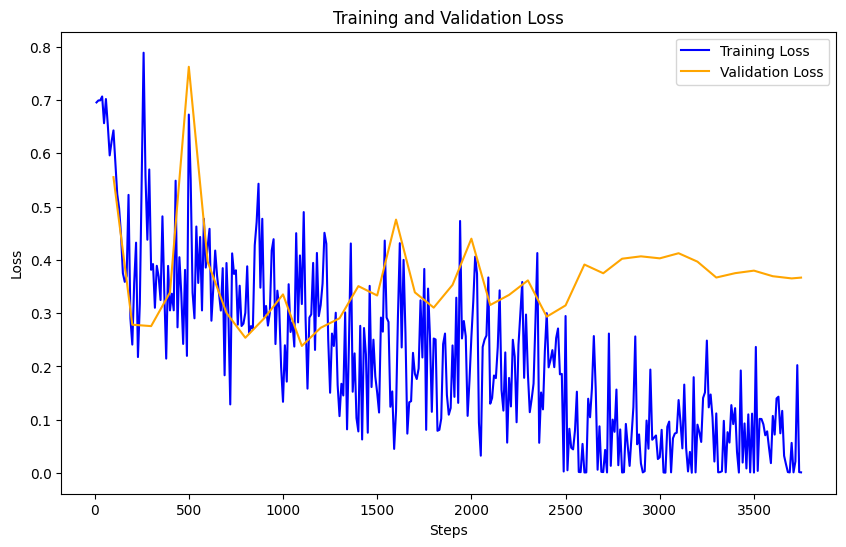

In [ ]:
import torch
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Define your other functions like tokenize_data, prepare_dataset, compute_metrics, etc.

def plot_learning_curves(trainer):
    training_loss = []
    eval_loss = []
    training_steps = []
    eval_steps = []

    for log in trainer.state.log_history:
        if "loss" in log and "eval_loss" not in log:
            training_loss.append(log["loss"])
            training_steps.append(log["step"])
        if "eval_loss" in log:
            eval_loss.append(log["eval_loss"])
            eval_steps.append(log["step"])

    plt.figure(figsize=(10, 6))
    plt.plot(training_steps, training_loss, label='Training Loss', color='blue')
    plt.plot(eval_steps, eval_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def main():
    if not torch.cuda.is_available():
        print("CUDA is not available. Please enable a GPU runtime in Google Colab.")
        return

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    train_dataset, test_dataset = prepare_dataset(tokenizer, sample_size=10000)

    trainer, model = train_model(train_dataset, test_dataset)
    results = evaluate_model(trainer)

    try:
        model.save_pretrained('./fine_tuned_bert')
        tokenizer.save_pretrained('./fine_tuned_bert')
        print("Model and tokenizer saved successfully.")
    except Exception as e:
        print(f"Error saving model/tokenizer: {e}")

    return trainer, model, tokenizer, test_dataset

if __name__ == "__main__":
    trainer, model, tokenizer, test_dataset = main()
    plot_learning_curves(trainer)


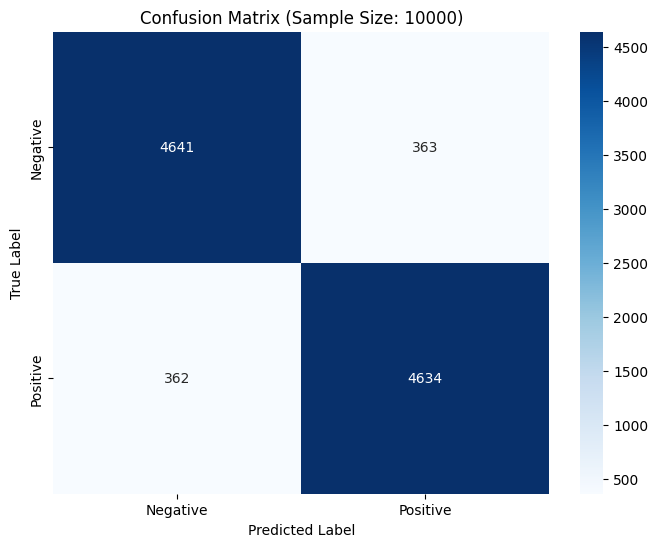

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch
from torch.utils.data import DataLoader, Subset
import random

def plot_confusion_matrix(model, test_dataset, batch_size=32, sample_size=10000):
    true_labels = []
    predictions = []

    # Randomly sample a smaller subset of the test dataset
    sampled_indices = random.sample(range(len(test_dataset)), min(sample_size, len(test_dataset)))
    test_subset = Subset(test_dataset, sampled_indices)
    test_loader = DataLoader(test_subset, batch_size=batch_size)

    for batch in test_loader:
        batch = {k: v.to(model.device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)

        true_labels.extend(batch['labels'].cpu().tolist())
        predictions.extend(preds.cpu().tolist())

    # Generate the confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (Sample Size: {sample_size})")
    plt.show()

# Example usage:
plot_confusion_matrix(model, test_dataset, batch_size=32, sample_size=10000)
